# Load Results

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
baseline_test_res = pd.read_csv('/content/drive/MyDrive/wzx/baseline/baseline_amazon_full_test_output.csv')
ensemble_test_res =  pd.read_csv('/content/drive/MyDrive/wzx/ensemble_amazon_full_v2_test_output.csv')

baseline_test_res['index'] = baseline_test_res.index
ensemble_test_res['index'] = ensemble_test_res.index


In [4]:
baseline_test_res.head()

,Text,Predicted_Prob,Label,Predicted_Label,Correct,index
0,Are all headphones manufactured in the same fa...,0.010884,0,0.0,True,0
1,I hate giving a single star to any company. Th...,0.000560,0,0.0,True,1
2,This is an excellent western made for cable TV...,0.996949,1,1.0,True,2
3,Really disappointed - for the first month I th...,0.002404,0,0.0,True,3
4,I needed a new band and I easily found it on A...,0.998976,1,1.0,True,4


In [5]:
ensemble_test_res.head()

,Text,Predicted_Prob,Label,Predicted_Label,Correct,index
0,Are all headphones manufactured in the same fa...,0.005109,0,0.0,True,0
1,I hate giving a single star to any company. Th...,0.000216,0,0.0,True,1
2,This is an excellent western made for cable TV...,0.994425,1,1.0,True,2
3,Really disappointed - for the first month I th...,0.000826,0,0.0,True,3
4,I needed a new band and I easily found it on A...,0.998532,1,1.0,True,4


In [6]:
compare_df = baseline_test_res.merge(ensemble_test_res, on = ['Text','Label','index'], suffixes = ['_baseline','_ensemble'])
compare_df = compare_df[['Text','Label',
                         'Predicted_Prob_baseline','Predicted_Label_baseline','Correct_baseline',
                         
                         'Predicted_Prob_ensemble','Predicted_Label_ensemble','Correct_ensemble']]
compare_df['Prob_Difference'] = compare_df['Predicted_Prob_ensemble'] - compare_df['Predicted_Prob_baseline']
compare_df.head()

,Text,Label,Predicted_Prob_baseline,Predicted_Label_baseline,Correct_baseline,Predicted_Prob_ensemble,Predicted_Label_ensemble,Correct_ensemble,Prob_Difference
0,Are all headphones manufactured in the same fa...,0,0.010884,0.0,True,0.005109,0.0,True,-0.005774
1,I hate giving a single star to any company. Th...,0,0.000560,0.0,True,0.000216,0.0,True,-0.000344
2,This is an excellent western made for cable TV...,1,0.996949,1.0,True,0.994425,1.0,True,-0.002524
3,Really disappointed - for the first month I th...,0,0.002404,0.0,True,0.000826,0.0,True,-0.001578
4,I needed a new band and I easily found it on A...,1,0.998976,1.0,True,0.998532,1.0,True,-0.000443


# Error Analysis - Baseline

## Baseline False Nagative

### High Probability False Negative

In [7]:
baseline_test_res[(baseline_test_res['Correct'] == False) & (baseline_test_res['Predicted_Label'] == 0 ) & (baseline_test_res['Predicted_Prob'] > 0.4)].sort_values(by = 'Predicted_Prob', ascending = True)

,Text,Predicted_Prob,Label,Predicted_Label,Correct,index
57174,It's looks good but the price dam if it was at...,0.400018,1,0.0,False,57174
319113,Entertaining free movie to watch o am a Mark W...,0.400050,1,0.0,False,319113
422465,This was a great hub. Unfortunately it died a...,0.400142,1,0.0,False,422465
254168,They work as advertised. This product didn't s...,0.400146,1,0.0,False,254168
409470,LIGHT WEIGHT AND COMPACT .WORKS LIKE A DREAM. ...,0.400237,1,0.0,False,409470
...,...,...,...,...,...,...
344064,I can't say enough about this film version of ...,0.499915,1,0.0,False,344064
38519,I got this (CM500) and the TP-LINK Archer C7 A...,0.499918,1,0.0,False,38519
191845,Great movie. Is this the unedited version whe...,0.499974,1,0.0,False,191845
379656,I ordered this one for my sister's Christmas g...,0.499992,1,0.0,False,379656


In [8]:
baseline_test_res.loc[57174].Text

"It's looks good but the price dam if it was at 227.99 or 225.99 I would of purchase it"

In [9]:
baseline_test_res.loc[254168].Text

"They work as advertised. This product didn't shake my world, but I'm 68, everything about me shakes.  So if you are looking for a life altering experience, this isn't it.\n\nBut...\n\nIf you are looking for a reliable CD-R this is it."

In [10]:
baseline_test_res.loc[86682].Text

'I am in the process of moving my pictures off of CDs and onto jump drives and am looking for high quality, high storage devices. Lexar is a trusted brand, so I was excited to find such a deal on this 8GB disk.\n\nI found the disk to perform as expected. It hold loads of pictures, creating an easy way for me to organize my photos from my sisters wedding, from shower to wedding, as well as all the files that go along with planning a wedding. I had no problems with speed as I added files to the disk, t which is a nice aspect of using a smaller size disk.\n\nIn terms of the design of the disk itself, the sleek black look is nice. It has a large hoop on the end, making it super easy to attach to a key chain or other something similar to keep from getting lost.  The blue drive itself closes into the black casing, which makes me feel better knowing the information on it is protected at all costs.  It is nice to know it will not accidentally open when in a bag or purse. Once the drive is pull

In [11]:
baseline_test_res.loc[379656].Text

"I ordered this one for my sister's Christmas gift because I liked the one I bought, from another company, so much!  Good wireless distance, page forward/reverse browser buttons and 3 programmable buttons.  I've had the same batteries in mine for 6 months now.  The ball pops right out for easy cleaning.  One of the most important aspects, I've dropped it several times and the worse that happened is the ball come loose (once) and I had to chase it."

### Low Probability False Negative

In [12]:
baseline_test_res[(baseline_test_res['Correct'] == False) & (baseline_test_res['Predicted_Label'] == 0 ) & (baseline_test_res['Predicted_Prob'] < 0.2)].sort_values(by = 'Predicted_Prob', ascending = True)

,Text,Predicted_Prob,Label,Predicted_Label,Correct,index
240384,"Poor acting, tired storyline.",0.000368,1,0.0,False,240384
329960,"Waste of good actors ! Another ""Good VS Evil""...",0.000372,1,0.0,False,329960
190683,Just no working volume control,0.000379,1,0.0,False,190683
437074,This product failed to work after 6 months. I ...,0.000402,1,0.0,False,437074
94161,I just lost interest quickly.\nDidn't find thi...,0.000404,1,0.0,False,94161
...,...,...,...,...,...,...
203457,"Excellent documentary. However, it's like a f...",0.199738,1,0.0,False,203457
149190,"""The left handed gun"" was part - with ""The nak...",0.199851,1,0.0,False,149190
346650,I bought this for my Niece & she loved it & st...,0.199892,1,0.0,False,346650
406831,A group of job applicants gather in a board ro...,0.199915,1,0.0,False,406831


In [13]:
baseline_test_res.loc[240384]['Text']

'Poor acting, tired storyline.'

This review has 5 stars but clearly it shows no sign of anything positive. From the text, we can tell that the author is not happy and yet still give a postive rating. This is an example of comment text can confuse the model in a sarcastic way. But note that the author uses sarcasm in assigning the label but not in the language used. Therefore, it should be expected our ensemble model cannot learn this sophistication either as it makes decision based on the text only.

## Baseline False Positive

### High Probability False Positive

In [14]:
baseline_test_res[(baseline_test_res['Correct'] == False) & (baseline_test_res['Predicted_Label'] == 1 ) & (baseline_test_res['Predicted_Prob'] > 0.8)].sort_values(by = 'Predicted_Prob', ascending = True)

,Text,Predicted_Prob,Label,Predicted_Label,Correct,index
165350,"The aphorism ""you get what you pay for"" applie...",0.800257,0,1.0,False,165350
311236,"We Love Picture 3D Smart Plasma HDTV, sound ha...",0.800669,0,1.0,False,311236
375857,I hate to be one of those guys you always see ...,0.800877,0,1.0,False,375857
78652,this is a really good product i bought a few m...,0.800889,0,1.0,False,78652
383470,While the story keeps us in our seat for 90 mi...,0.800936,0,1.0,False,383470
...,...,...,...,...,...,...
271897,Just what I need for my tablet; easy to use. ...,0.999009,0,1.0,False,271897
267560,My son wanted this to add to his collection. I...,0.999011,0,1.0,False,267560
67554,My son wanted this to add to his collection. I...,0.999011,0,1.0,False,67554
51594,Exactly as described and fast shipping. Excell...,0.999012,0,1.0,False,51594


In [15]:
baseline_test_res.loc[167740]['Text']

'Love it, comfortable and has nice inside to protect my equipment.'

In [16]:
baseline_test_res.loc[271897]['Text']

'Just what I need for my tablet; easy to use.  A reliable Samsung product; my second purchase within a month (one for my smartphone as well).  You can rely on Samsung.'

In [17]:
baseline_test_res.loc[51594]['Text']

'Exactly as described and fast shipping. Excellent product!'

The above cases indicate that labels might not be reliable 

### Low Probability False Positive

In [18]:
baseline_test_res[(baseline_test_res['Correct'] == False) & (baseline_test_res['Predicted_Label'] == 1 ) & (baseline_test_res['Predicted_Prob'] < 0.6)].sort_values(by = 'Predicted_Prob', ascending = True).tail(20)

,Text,Predicted_Prob,Label,Predicted_Label,Correct,index
387033,"It works fine. But it uses an odd sized plug, ...",0.598788,0,1.0,False,387033
162714,The speaker looks good and was functional righ...,0.598927,0,1.0,False,162714
354648,When Elvis Presley was near the end of his lif...,0.598962,0,1.0,False,354648
151506,"I'm all for movies that are based on books, I ...",0.598974,0,1.0,False,151506
266265,As a precursor: I'm the owner and lead install...,0.599028,0,1.0,False,266265
128035,There must be a manufacturing plant that's cre...,0.599041,0,1.0,False,128035
216921,"looks like a class project, hopefully they got...",0.599225,0,1.0,False,216921
311165,Despite its popularity I wasn't crazy about th...,0.599275,0,1.0,False,311165
156907,HOW TO TAKE RING ADAPTER OFF from lens. I thi...,0.599445,0,1.0,False,156907
284672,I've been using this mount for over a month no...,0.599460,0,1.0,False,284672


In [19]:
baseline_test_res.loc[344003]['Text']

'I use this for my iPhone 6s and it fit well. Nice first step to VR. Comfortable enough and straps are stable.\nOne major fault is the suction cups to hold the phone in place. It will get loose and slide around. This was a deal breaker for me and bought something else that would keep my phone in place.'

In [20]:
baseline_test_res.loc[143236]['Text']

'Big.........so big. Size are differents for lens.'

In [21]:
compare_df.loc[143236]

Text                        Big.........so big. Size are differents for lens.
Label                                                                       0
Predicted_Prob_baseline                                              0.599917
Predicted_Label_baseline                                                  1.0
Correct_baseline                                                        False
Predicted_Prob_ensemble                                              0.558033
Predicted_Label_ensemble                                                  1.0
Correct_ensemble                                                        False
Prob_Difference                                                     -0.041883
Name: 143236, dtype: object

In [22]:
baseline_test_res.loc[277554]['Text']

"Great sound and great features. The radio tuning dial didn't always make the channel indicator move while tuning.\n\nThe picture shows amazon's crappy packaging."

# Error Analysis - Ensemble

In [23]:
ensemble_test_res['Correct'].value_counts()

True     429166
False     26614
Name: Correct, dtype: int64

## Ensemble False Nagative

In [24]:
ensemble_test_res[(ensemble_test_res['Correct'] == False) & (ensemble_test_res['Predicted_Label'] == 0 ) & (ensemble_test_res['Predicted_Prob'] > 0.4)].sort_values(by = 'Predicted_Prob', ascending = True)

,Text,Predicted_Prob,Label,Predicted_Label,Correct,index
372653,I'm a big fan of History Channel's How the Ear...,0.400045,1,0.0,False,372653
293865,"Supernatural thriller, not a horror movie. Th...",0.400054,1,0.0,False,293865
424319,"<a data-hook=""product-link-linked"" class=""a-li...",0.400095,1,0.0,False,424319
351081,"Nicolas Cage stars as Kyle Miller, a rich succ...",0.400095,1,0.0,False,351081
214732,When creating anything in this world one must ...,0.400101,1,0.0,False,214732
...,...,...,...,...,...,...
35752,I have Yosemite installed on my Mac. The drive...,0.499683,1,0.0,False,35752
341311,Animals going crazy attacking people is scary.,0.499722,1,0.0,False,341311
38405,"I love the shuffle, but as a senior I had a le...",0.499788,1,0.0,False,38405
132625,Italian Mafia,0.499956,1,0.0,False,132625


### High Probability False Negative

In [25]:
ensemble_test_res.loc[372653].Text

"I'm a big fan of History Channel's How the Earth Was Made even though I know that most of the earth was created by volcanoes, plate tectonics, glaciers, erosion, ect.  This show was pretty much the same stuff, but this seemed to have better production values, graphics and overall a higher budget.  Even though I knew most of what was going to be talked about, I couldn't stop watching the beautifully photographed episodes. So overall, I'd recommend this one before the History's series, but if you love this then be sure to check that out.  Also expect to see more stuff about Global Warming in this than in the US based show (from my trip to London it seems global warming is much more talked about there by just about everyone).\n\nFor those trying to decide between the bluray and dvd, I first rented this on DVD before running out and buying it on bluray and while the bluray has some improvement in quality, in my opinion its not enough to justify changing if you already have the DVD."

In [26]:
ensemble_test_res.loc[25934].Text

"I bought this camera in November 2013 and had to return it because it froze up during the initialization process.  However, I took a chance on another one and it has worked perfectly for the two years I've used it.  I mostly view the camera using the iSecurity+ iPad app but the seedonk website also is nice as it has the last 24 hours of motion sensor-triggered video available for review.\n\nIt is troubling that there are so many one star reviews but in my case the camera has worked as expected and I am considering buying another one to watch the front of my house."

In [27]:
ensemble_test_res.loc[132625].Text

'Italian Mafia'

In [28]:
compare_df.loc[132625]

Text                        Italian Mafia
Label                                   1
Predicted_Prob_baseline          0.501188
Predicted_Label_baseline              1.0
Correct_baseline                     True
Predicted_Prob_ensemble          0.499956
Predicted_Label_ensemble              0.0
Correct_ensemble                    False
Prob_Difference                 -0.001232
Name: 132625, dtype: object

The ensemble model considers "Italian Mafia" as negative sentiment, while the baseline model thinks the term is positive. As we can see the short term is not showing clear positive or negative signs so it's possible for the ensemble model to get confused.

### Low Probability False Negative

In [29]:
ensemble_test_res[(ensemble_test_res['Correct'] == False) & (ensemble_test_res['Predicted_Label'] == 0 ) & (ensemble_test_res['Predicted_Prob'] < 0.2)].sort_values(by = 'Predicted_Prob', ascending = True)

,Text,Predicted_Prob,Label,Predicted_Label,Correct,index
370040,Awful flick. And I love old awful flicks of th...,0.000056,1,0.0,False,370040
247562,The mouse wheel is way too loose. It moves on ...,0.000064,1,0.0,False,247562
340967,I didn't and now I am paying big time Wasted a...,0.000084,1,0.0,False,340967
55760,"all these pieces are meh, they don't lock, the...",0.000085,1,0.0,False,55760
248684,What a terrible casserole this DVD makes. Nee...,0.000087,1,0.0,False,248684
...,...,...,...,...,...,...
320290,"I just purchased this recently, actually befor...",0.199658,1,0.0,False,320290
453064,Some laptop devices (like my Dell XPS 1530) us...,0.199795,1,0.0,False,453064
271241,I always look forward to the next Woody Allen ...,0.199823,1,0.0,False,271241
206452,"When I bought my Nikon D3200, I bought it with...",0.199967,1,0.0,False,206452


In [30]:
ensemble_test_res.loc[370040].Text

'Awful flick. And I love old awful flicks of this genre!'

The above example shows interesting contrasting meaning between "awful" vs. "love". The reviewer is trying to express positive sentiment but the ensemble model detects negative sentiment potentially from the term "awful".

In [31]:
# Based on reading the sentence, the reviewer shows no sign of positive sentiment. This could be a mistake on label.
ensemble_test_res.loc[248684].Text

'What a terrible casserole this DVD makes.  Needs salsa...'

In [32]:
ensemble_test_res.loc[206452].Text

'When I bought my Nikon D3200, I bought it with the two basic Nikon kit lenses-- the 18-55 and the 55-200.  While the 18-55 has fulfilled its role just fine, I was never happy with the 55-200.  Nothing ever looked as sharp as I felt it should.  And if you ended up cropping your shots to get a larger image?  Forget it.  The Tamron 70-300, by contrast, has outstanding sharpness.  There\'s just no comparison between it and the Nikon kit lens.  I can not stress this enough:  If you\'re buying a Nikon, skip the 55-200mm kit lens, no matter how cheaply they toss it in for.  Save your money and get something that will give you pictures you\'ll want to share.\n\nOne weakness is the focusing.  It\'s quiet, but it often has trouble coming to focus at least if you\'re trying to photograph a small, moving object (hawks, turkey vultures, etc).  It also has trouble on small objects in the foreground, where it will instead autofocus to the background.  You can always switch the autofocus off when thi

The above review shows that the reviewer is happy with one of the 18-55 lense but unhappy with 55-200 lense. This is a review combining the whole Nikon product as a package, which is challenging for the model to detect the polarity among smaller subsets of the product.

## Ensemble False Positive

### High Probability False Positive

In [33]:
ensemble_test_res[(ensemble_test_res['Correct'] == False) & (ensemble_test_res['Predicted_Label'] == 1 ) & (ensemble_test_res['Predicted_Prob'] > 0.8)].sort_values(by = 'Predicted_Prob', ascending = True)

,Text,Predicted_Prob,Label,Predicted_Label,Correct,index
85590,Not much to say but battery took a while to sh...,0.800054,0,1.0,False,85590
305838,I just wanted a pair of cheap earbuds to throw...,0.800059,0,1.0,False,305838
97940,I wanted to review this specific release:&nbsp...,0.800075,0,1.0,False,97940
78890,The biggest French box-office disaster in rece...,0.800132,0,1.0,False,78890
235233,"Horendous thats all i can say,Here is a compan...",0.800314,0,1.0,False,235233
...,...,...,...,...,...,...
357954,This worked fine. Major upgrade from the orig...,0.998964,0,1.0,False,357954
347510,I have a set of Uniden cordless phones and use...,0.999063,0,1.0,False,347510
222565,Excelente 100 Por Siento Brutalmente,0.999065,0,1.0,False,222565
76268,Best cables you can buy.,0.999091,0,1.0,False,76268


In [34]:
ensemble_test_res.loc[76268].Text

'Best cables you can buy.'

Although the review "Best cables you can buy" clearly shows a positive signal, the actual label is a low rating which appears to be a sarcastic comment with opposite meaning. This is difficult for the ensemble model to detect as the label is hidden during testing.

In [35]:
ensemble_test_res.loc[235233].Text

'Horendous thats all i can say,Here is a company that owns 90 percent of the wrestling federations libraies and this is all they can give. What happened to The Valiant Brothers,what happened to Chief Jay Strongbow and Sonny King,what happened to King Curtis and Baron Sicluna,Tarzan Tyler and Crazy Luke Graham,how about the florida tag team slike paksang and Joe leduc,The hollywood blondes featuring a pre freebird Buddy jack roberts. And by the way Vince mcmahon what happened to the release of the Three Shea Stadium Cards,This is why The WWF attendance is down and tv rating down..'

In [36]:
ensemble_test_res.loc[305838].Text

'I just wanted a pair of cheap earbuds to throw in my backpack or use on the riding lawn mower.  These were quite secure in my ear since the wires are designed to go over the top of your ear.  Sound quality was okay but whenever I used them on a phone call people told me the sound quality was horrible... as in completely unusable.'

### Low Probability False Positive

In [37]:
ensemble_test_res[(ensemble_test_res['Correct'] == False) & (ensemble_test_res['Predicted_Label'] == 1 ) & (ensemble_test_res['Predicted_Prob'] < 0.6)].sort_values(by = 'Predicted_Prob', ascending = True).tail(20)

,Text,Predicted_Prob,Label,Predicted_Label,Correct,index
213267,Just do yourself a favor and watch the 10 min...,0.599123,0,1.0,False,213267
316516,I bought the 16-piece Precision Screwdriver ki...,0.599144,0,1.0,False,316516
111456,AMAZON REPLACED NO QUESTIONS ASKED! This is al...,0.599171,0,1.0,False,111456
409101,"10$ from Apple, why pay more?",0.599224,0,1.0,False,409101
182369,Want to buy but need to no if I can plug my an...,0.599286,0,1.0,False,182369
187259,damnit people...a movie about killer bats...wo...,0.599293,0,1.0,False,187259
208255,Very dark humor.,0.599408,0,1.0,False,208255
401048,Having seen the original Star Wars on the big ...,0.599427,0,1.0,False,401048
295746,If you like day time soap opera's you will lov...,0.599429,0,1.0,False,295746
33820,I have had other garmin GPS units so I am fami...,0.599533,0,1.0,False,33820


In [38]:
ensemble_test_res.loc[213267].Text

'Just do yourself a favor  and watch the 10 min clip on youtube. It has the best moments in the movie without you having to sit through the entire movie just for 10 min of laughter'

In [39]:
ensemble_test_res.loc[409101].Text

'10$ from Apple, why pay more?'

In [40]:
ensemble_test_res.loc[295746].Text

"If you like day time soap opera's you will love this film. The people and their reactions  are not real. An example, I know of few women who when left at the alter, on their wedding day with friends and family standing there because the groom left you for another man stand there and say nothing."

In [41]:
ensemble_test_res.loc[310483].Text

"Can't believe she got an oscar for this over Dr Zhivago. She did a nude scene and back then it was something special."

# Cross Model Comparison

## Predicted Probability Distribution

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

Overall, ensemble is reducing the predicted probability, compared to the baseline model.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Overall: Ensemble Prob - Baseline Prob')

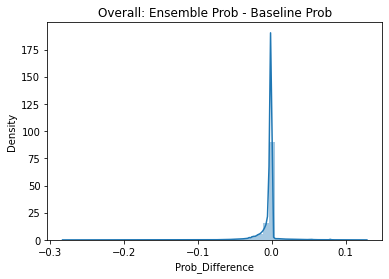

In [43]:
sns.distplot(compare_df['Prob_Difference'], kde = True)   
plt.title('Overall: Ensemble Prob - Baseline Prob')

In [44]:
baseline_error = compare_df[compare_df['Correct_baseline'] == False]
baseline_fp = compare_df[(compare_df['Correct_baseline'] == False) & (compare_df['Predicted_Label_baseline'] == 1)]
baseline_fn = compare_df[(compare_df['Correct_baseline'] == False) & (compare_df['Predicted_Label_baseline'] == 0)]

It is not surprising that ensemble model gives predicted probability lower than baseline model among the cases where baseline makes wrong predictions

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Baseline Wrong Predictions: Ensemble Prob - Baseline Prob')

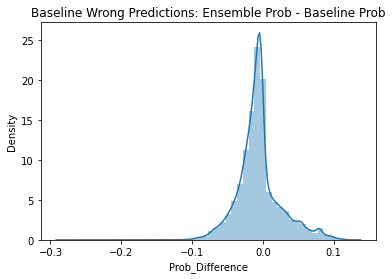

In [45]:
sns.distplot(baseline_error['Prob_Difference'], kde = True)   
plt.title('Baseline Wrong Predictions: Ensemble Prob - Baseline Prob')

The effectiveness of ensemble shows up when baseline gives false positives. The predicted probability is lower than the baseline, which means ensemble help to correct false positives by lowering the probabilities.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    13174.000000
mean        -0.008795
std          0.030600
min         -0.152568
25%         -0.025292
50%         -0.009220
75%         -0.000993
max          0.125897
Name: Prob_Difference, dtype: float64


Text(0.5, 1.0, 'Baseline False Positive: Ensemble Prob - Baseline Prob')

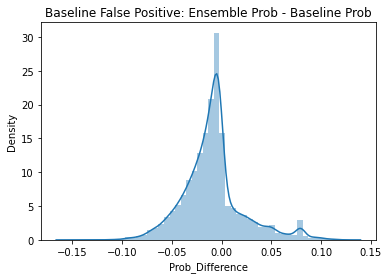

In [46]:
sns.distplot(baseline_fp['Prob_Difference'], kde = True)  
print(baseline_fp['Prob_Difference'].describe())  
plt.title('Baseline False Positive: Ensemble Prob - Baseline Prob')

count    13364.000000
mean        -0.002005
std          0.030612
min         -0.279942
25%         -0.017648
50%         -0.005843
75%          0.009633
max          0.116147
Name: Prob_Difference, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Ensemble Prob - Baseline Prob')

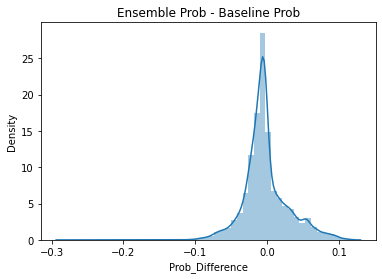

In [47]:
sns.distplot(baseline_fn['Prob_Difference'], kde = True)  
print(baseline_fn['Prob_Difference'].describe()) 
plt.title('Ensemble Prob - Baseline Prob')

There is no significant difference between predicted probabilities of baseline and ensemble among their misclassified cases.  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


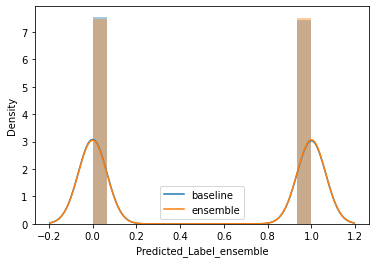

In [48]:
ensemble_error = compare_df[compare_df['Correct_ensemble'] == False]
baseline_error = compare_df[compare_df['Correct_baseline'] == False]
plt.figure()            
sns.distplot(baseline_error['Predicted_Label_baseline'], kde = True)           
sns.distplot(ensemble_error['Predicted_Label_ensemble'], kde = True)
plt.legend(['baseline','ensemble'])


## Ensemble Is Correct and Baseline Is Wrong

In [49]:
ensemble_T_baseline_F = compare_df[(compare_df['Correct_baseline'] == False) & (compare_df['Correct_ensemble'] == True)]
ensemble_T_baseline_F

,Text,Label,Predicted_Prob_baseline,Predicted_Label_baseline,Correct_baseline,Predicted_Prob_ensemble,Predicted_Label_ensemble,Correct_ensemble,Prob_Difference
17,first of all let me start off by saying that i...,1,0.489620,0.0,False,0.515878,1.0,True,0.026258
41,Saw the series on tv and wanted it. Did not op...,1,0.477520,0.0,False,0.556364,1.0,True,0.078844
436,I picked this up for a specific purpose.\n\nHe...,0,0.526349,1.0,False,0.480445,0.0,True,-0.045905
2078,Stallone is unbelievable as a bodybuilder/moun...,0,0.514824,1.0,False,0.466544,0.0,True,-0.048280
2228,Good headphone for the price ($40). Lightweigh...,0,0.501161,1.0,False,0.491861,0.0,True,-0.009300
...,...,...,...,...,...,...,...,...,...
453685,wife here: Noam Chomsky (et alia) wrote a nice...,0,0.506216,1.0,False,0.466275,0.0,True,-0.039941
453885,"Awesome camera till it dies, NOW I read onlin...",0,0.536296,1.0,False,0.494157,0.0,True,-0.042139
454560,Sounded great...plug failed about 8 months in....,1,0.457476,0.0,False,0.511261,1.0,True,0.053785
455518,"<div id=""video-block-R3400PSFKSQ6WM"" class=""a-...",1,0.493776,0.0,False,0.513335,1.0,True,0.019559


In [50]:
ensemble_T_baseline_F.sort_values(by = 'Prob_Difference', ascending = False).head(30)


,Text,Label,Predicted_Prob_baseline,Predicted_Label_baseline,Correct_baseline,Predicted_Prob_ensemble,Predicted_Label_ensemble,Correct_ensemble,Prob_Difference
421304,"our last one broke for no reason, but at this ...",1,0.407678,0.0,False,0.517142,1.0,True,0.109464
57208,"I bought this to replace my last Blason case, ...",1,0.411510,0.0,False,0.520434,1.0,True,0.108924
369892,I have been using pioneer audio products for a...,1,0.394801,0.0,False,0.503394,1.0,True,0.108592
294896,"I've never been a fan of Disney movies, most a...",1,0.437311,0.0,False,0.545374,1.0,True,0.108063
452329,Although I have watched hundreds of films thro...,1,0.490750,0.0,False,0.598260,1.0,True,0.107510
182796,This thing has been being used; and somewhat a...,1,0.461948,0.0,False,0.568954,1.0,True,0.107006
52379,"First off, I install quite a few (20 - 30) of ...",1,0.448548,0.0,False,0.555067,1.0,True,0.106518
364618,I had a previous hard disk enclosure fail and ...,1,0.430581,0.0,False,0.536134,1.0,True,0.105552
176311,I originally purchased the Harmony Touch remot...,1,0.469616,0.0,False,0.575156,1.0,True,0.105540
349522,this was actually a really funny movie. it sta...,1,0.450830,0.0,False,0.556159,1.0,True,0.105329


In [51]:
# Example of Sarcasm
ensemble_T_baseline_F.loc[455579].Text

'Dear Makers Of Date Movie,\n\n  You Suck.\n\n  Kind Regards, Joey Bananas\n\n  "The Movie Monkey"'

In [52]:
# Example of Stress
ensemble_T_baseline_F.loc[284549].Text

"I don't know what to say. It works, which is in contrast to the customer service from DirecTV. The sales person said I didn't need a separate tuner to receive over the air broadcast including all the subchannels, which was wrong. The installer said that the Genie doesn't provide that functionality, and he said there is no separate tuner available. The DirecTV tech support said (after asking his manager) that the AM21 can not connect to a Genie because it needs to connect with coax. All official DirecTV representatives were all wrong!\n\nSeveral forums online said that the AM21 will work with the Genie, and the forums were correct! After plugging everything in and doing the initial antenna set up, I can now watch over the air TV in all my rooms, which includes the Genie clients. I get all the subchannels. All the OTA channels that are only available in standard definition on DirecTV are now in HD. Some small independent channels may not have the show titles shown in the guide, but the 

In [62]:
ensemble_T_baseline_F.loc[284549]

Text                        I don't know what to say. It works, which is i...
Label                                                                       1
Predicted_Prob_baseline                                               0.49581
Predicted_Label_baseline                                                  0.0
Correct_baseline                                                        False
Predicted_Prob_ensemble                                              0.592547
Predicted_Label_ensemble                                                  1.0
Correct_ensemble                                                         True
Prob_Difference                                                      0.096737
Name: 284549, dtype: object

## Ensemble Is Wrong and Baseline Is Correct

In [73]:
ensemble_F_baseline_T = compare_df[(compare_df['Correct_baseline'] == True) & (compare_df['Correct_ensemble'] == False)]
ensemble_F_baseline_T.sort_values(by = 'Prob_Difference', ascending = True).tail(30)

,Text,Label,Predicted_Prob_baseline,Predicted_Label_baseline,Correct_baseline,Predicted_Prob_ensemble,Predicted_Label_ensemble,Correct_ensemble,Prob_Difference
184368,"I've used two-way radios for decades, from the...",0,0.481496,0.0,True,0.577729,1.0,False,0.096233
199496,More than a year ago I bought these. They soun...,0,0.436137,0.0,True,0.532748,1.0,False,0.096611
226402,Replaced the card in my Alienware M17x with th...,0,0.415952,0.0,True,0.512665,1.0,False,0.096713
45620,I recently got the Bose OE2 headphones because...,0,0.445429,0.0,True,0.542300,1.0,False,0.096871
17107,The seller was okay. They delivered what was a...,0,0.436223,0.0,True,0.533641,1.0,False,0.097418
245779,I had another Anker product that lasted about ...,0,0.433440,0.0,True,0.531024,1.0,False,0.097583
291669,I purchased an HP Envy 17 Laptop from Amazon. ...,0,0.491831,0.0,True,0.589730,1.0,False,0.097899
29957,"Much like other customers, I did a fair amount...",0,0.470454,0.0,True,0.568377,1.0,False,0.097923
46468,I bought an OEM from newegg then one from here...,0,0.430068,0.0,True,0.528230,1.0,False,0.098161
179227,Although I wish that FOX had released individu...,0,0.492958,0.0,True,0.591139,1.0,False,0.098181


In [76]:
ensemble_F_baseline_T.describe()

,Label,Predicted_Prob_baseline,Predicted_Label_baseline,Predicted_Prob_ensemble,Predicted_Label_ensemble,Prob_Difference
count,727.000000,727.000000,727.000000,727.000000,727.000000,727.000000
mean,0.422283,0.493122,0.422283,0.505103,0.577717,0.011981
std,0.494263,0.030997,0.494263,0.033609,0.494263,0.055890
min,0.000000,0.390654,0.000000,0.415681,0.000000,-0.099247
25%,0.000000,0.472780,0.000000,0.482949,0.000000,-0.039573
50%,0.000000,0.495527,0.000000,0.504911,1.000000,0.022805
75%,1.000000,0.513536,1.000000,0.526472,1.000000,0.057712
max,1.000000,0.580525,1.000000,0.600252,1.000000,0.116788


In [61]:
ensemble_F_baseline_T.loc[97061].Text

'Great movie...sets off the mind...and pushes limits in every way!'

In [74]:
ensemble_F_baseline_T.loc[17107].Text


"The seller was okay. They delivered what was advertised and in good packaging. Although, they did deliver much later than original date. It was delayed several weeks. in this case, that was not a big issue for me.\n\nI am not satisfied with the product. I should have done more research, but I expected it to work like my old iPods. My dissatisfaction is specific to my needs. I listen to podcasts at night as I drift off to sleep. During the night I awake and will start the podcast over or start a new one. Seems simple and straightforward. However, this model of iPod will not just play 1 podcast and stop. Instead it will either continuously play the same podcast over and over or play the next podcast until manual intervention stops it or the battery is drained. I searched support and forums and found this is a known issue. Recently it also started reading off the list of podcasts while playing a podcast. I have no idea why/ how I made it happen or exactly how to stop it. I reckon there i

There is no clearn pattern found in the cases where baseline model predicts right and ensemble makes it worse. It might be possible that the ensemble model brings in bias and leads the model to always output a lower predicted probability.